In [21]:
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from interpret.blackbox import LimeTabular
from interpret import show
import shap


# %run (in .ipynb) is similar to import function from .py files.
%run utils.ipynb

In [22]:
# %% Load and preprocess data
data_loader = DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()
# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()
# Oversample the train data
X_train, y_train = data_loader.oversample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

(7778, 21)
(1022, 21)


In [23]:

print("Number of unique labels in y_train:", pd.Series(y_train).value_counts())
print("Unique unique labels in y_test:", pd.Series(y_test).value_counts())


Number of unique labels in y_train: stroke
0    3889
1    3889
Name: count, dtype: int64
Unique unique labels in y_test: stroke
0    972
1     50
Name: count, dtype: int64


In [24]:
# random forest as blackbox model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
print(f"Prescision {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall {recall_score(y_test, y_pred, average='weighted')}")


F1 Score 0.5353124509147424
Accuracy 0.9461839530332681
Prescision 0.9202049119532149
Recall 0.9461839530332681


In [25]:

# Initilize Lime for Tabular data
lime = LimeTabular(model=rf.predict_proba, 
                   data=X_train, 
                   random_state=1)
# Get local explanations
lime_local = lime.explain_local(X_test[-20:], 
                                y_test[-20:], 
                                name='LIME')

show(lime_local)

# %%

<!-- http://127.0.0.1:7425/5906193680/ -->

In [26]:
#SHAP Explaner 

In [27]:


# %% Create SHAP explainer
explainer = shap.TreeExplainer(rf)
# Calculate shapley values for test data
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]



,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi
2813,False,True,False,False,True,False,False,True,False,False,...,True,False,False,True,False,43.0,0,0,91.13,33.9


In [28]:
# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values

# %% >> Visualize local predictions
shap.initjs()


(1, 21)


In [29]:
# Force plot
prediction = rf.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index]) # for values


The RF predicted: 0


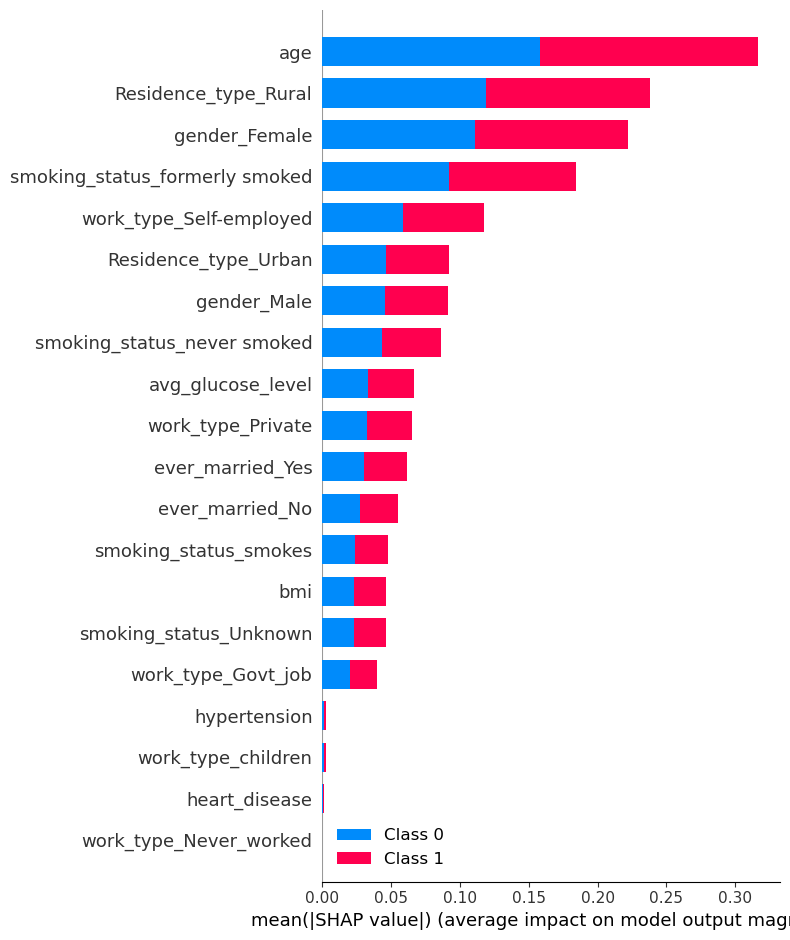

In [15]:
# %% >> Visualize global features
# Feature summary
shap.summary_plot(shap_values, X_test)